In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class GradientDescent:
    
    def __init__(self, points: int = 1000, polynomial_degree: int = 3, start_params = None, num_iter = 9000, lr = 0.1):
        self.points = points
        self.degree = polynomial_degree
        self.params = start_params
        self.iterations = num_iter
        self.learning_rate = lr
        
        self.x = None
        self.y = None

    def generate_points(self):
        self.x = np.linspace(0, 1, num = self.points)        
        self.y = np.cos(1.5*np.pi*self.x) + np.random.normal(0, 1, size = self.points)*0.02
        return self.x, self.y

    def return_gradient(self, f, x, eps=10**(-8)):
        value = np.array([f(x + dx) - f(x - dx) for dx in eps * np.eye(x.shape[0])])
        return value / eps / 2

    def grad_descent(self):

        self.generate_points()
        
        if self.params is None:
            self.params = np.zeros(self.degree+1)
        
        poly = PolynomialFeatures(self.degree)
        self.x = poly.fit_transform(self.x.reshape(-1,1))
        
        MSE = lambda p: np.mean((y - self.x@p)**2)

        for _ in range(self.iterations):
            self.params -= self.return_gradient(f = MSE, x = self.params)*self.learning_rate
        return self.params, self.x

In [3]:
c = GradientDescent(polynomial_degree=2,num_iter = 3000)
x,y = c.generate_points()

[ 1.55413703 -6.98109224  5.17029528]
my coefs: [ 1.33328898 -5.74537915  3.97807888]
true coefs:[ 1.55413703 -6.98109224  5.17029528]


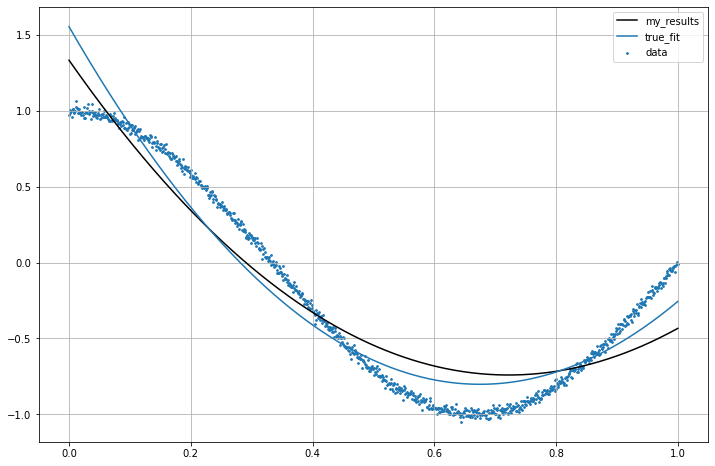

In [4]:
mini, X = c.grad_descent()
true = np.linalg.inv(X.T@X)@(X.T)@y
from sklearn.linear_model import LinearRegression
u = LinearRegression(fit_intercept=False)
u.fit(X,y)
print(u.coef_)
print(f"my coefs: {mini}")
print(f"true coefs:{true}")
resuts = X @ mini
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x, resuts,label = 'my_results',color = 'black')
ax.scatter(x, y,s=3,label = 'data')
ax.plot(x,X.dot(true),label = 'true_fit')
plt.legend()
plt.grid()
plt.show()